LIBRARIES_CLEANED

RMSE for Hồi quy tuyến tính: 433757.30539819296
RMSE for Cây quyết định: 485597.78660770325
RMSE for Random Forest: 355480.0402099583
RMSE for Gradient Boosting: 383709.6968357363


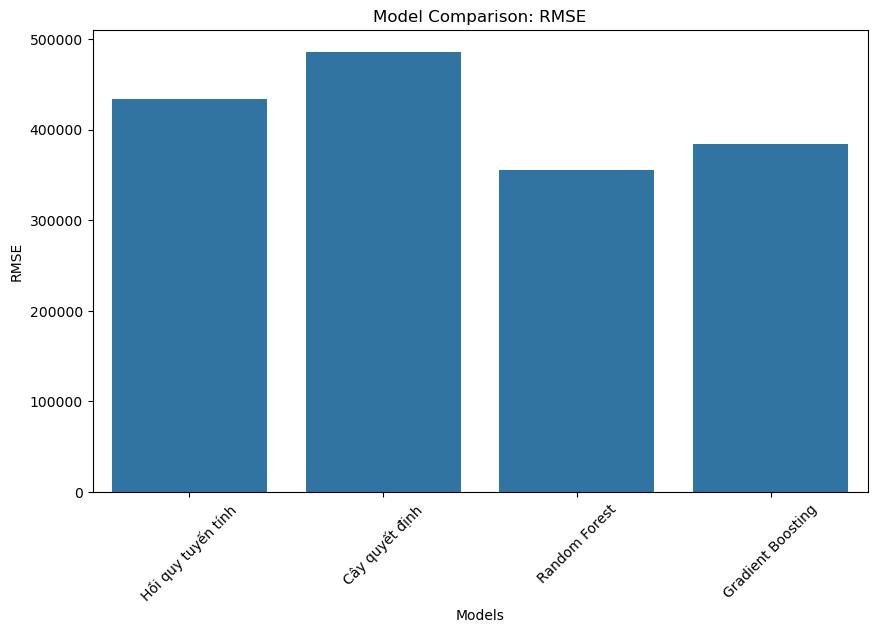

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import numpy as np

# Đọc và tiền xử lý dữ liệu
data = pd.read_csv('libraries_cleaned.csv').dropna()
X = data[['service_population', 'total_staff', 'print_collection', 'digital_collection', 'library_visits', 'registered_users']]
y = data['circulation_transactions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Danh sách các mô hình
models = {
    'Hồi quy tuyến tính': LinearRegression(),
    'Cây quyết định': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Huấn luyện, đánh giá và lưu mô hình
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"{name}: MSE = {mse}, R-squared = {r2}")
#     joblib.dump(model, f"{name.replace(' ', '_').lower()}.joblib")  # Lưu mô hình

# Lưu trữ RMSE cho từng mô hình
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'RMSE for {name}: {rmse}')
    joblib.dump(model, f"{name.replace(' ', '_').lower()}.joblib")

# Trực quan hóa hiệu suất mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison: RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

In [4]:
import pandas as pd
import joblib

# Dữ liệu mới để dự đoán
new_data = pd.DataFrame({
    'service_population': [5000],
    'total_staff': [10],
    'print_collection': [10000],
    'digital_collection': [5000],
    'library_visits': [300],
    'registered_users': [200]
})
# Tách biến độc lập cho dữ liệu mới
X_new = new_data[['service_population', 'total_staff', 'print_collection', 'digital_collection', 'library_visits', 'registered_users']]

# Tạo từ điển để chứa dự đoán
predictions = {}

# Danh sách tên các mô hình đã lưu
model_names = ['hồi_quy_tuyến_tính', 'cây_quyết_định', 'random_forest', 'gradient_boosting']

# Dự đoán với các mô hình đã lưu
for name in model_names:
    model = joblib.load(f'{name}.joblib')  # Tải mô hình đã lưu từ file .joblib
    predictions[name] = model.predict(X_new)  # Dự đoán với dữ liệu mới
    print(f'Predictions from {name}:', predictions[name][0])  # In ra dự đoán cho từng mô hình

Predictions from hồi_quy_tuyến_tính: 7838.869990190084
Predictions from cây_quyết_định: 115275.0
Predictions from random_forest: 45743.76
Predictions from gradient_boosting: 40207.37946963161


STATES CLEANED

RMSE for LinearRegression: 45441708.282111205
RMSE for DecisionTreeRegressor: 34509425.650644526
RMSE for RandomForestRegressor: 88623443.74858059
RMSE for GradientBoostingRegressor: 136630065.66846517


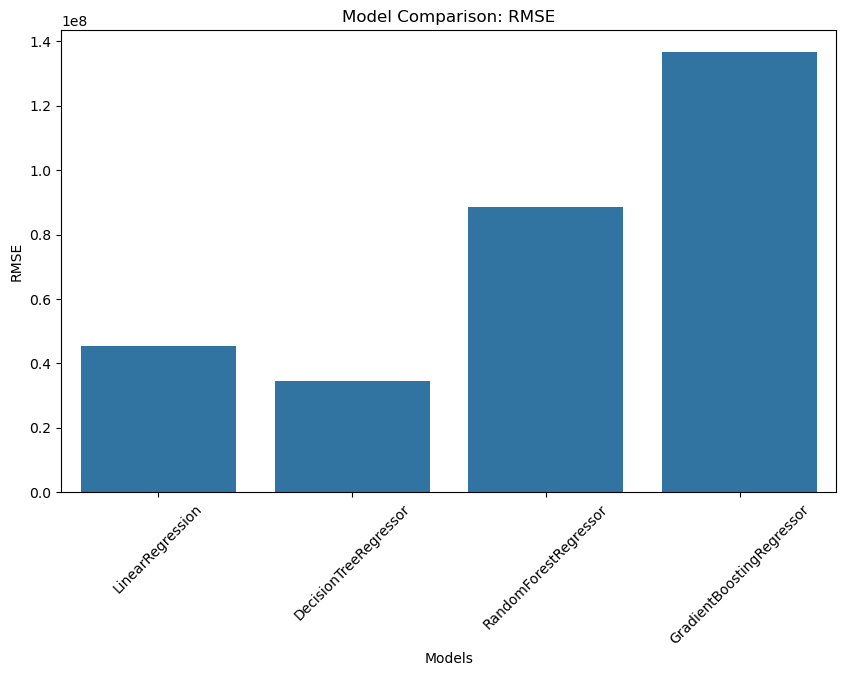

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Giả sử df là DataFrame chứa dữ liệu của bạn
df = pd.read_csv('states_cleaned.csv')  # Đọc dữ liệu từ file CSV

# Tách biến độc lập và biến phụ thuộc
X = df[['service_population', 'total_staff', 'print_collection', 'digital_collection', 'library_visits', 'registered_users']]
y = df['total_operating_revenue']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Danh sách các mô hình
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

# Huấn luyện, đánh giá và lưu mô hình
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"{name}: MSE = {mse}, R-squared = {r2}")
#     joblib.dump(model, f"{name.replace(' ', '_').lower()}.joblib")  # Lưu mô hình

# Lưu trữ RMSE cho từng mô hình
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'RMSE for {name}: {rmse}')
    joblib.dump(model, f"{name.replace(' ', '_').lower()}.joblib")

# Trực quan hóa hiệu suất mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison: RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


In [7]:
import pandas as pd
import joblib

# Giả sử new_data là DataFrame chứa dữ liệu mới mà bạn muốn dự đoán
# new_data = pd.read_csv('new_data.csv')  # Đọc dữ liệu mới từ file CSV

# Tạo một ví dụ về dữ liệu mới (giả sử bạn có các giá trị này)
data = {
    'service_population': [50000],
    'total_staff': [120],
    'print_collection': [300000],
    'digital_collection': [15000],
    'library_visits': [450000],
    'registered_users': [20000]
}

new_data = pd.DataFrame(data)

# Tách biến độc lập cho dữ liệu mới
X_new = new_data[['service_population', 'total_staff', 'print_collection', 'digital_collection', 'library_visits', 'registered_users']]

# Tạo từ điển để chứa dự đoán
predictions = {}

# Danh sách tên các mô hình đã lưu
model_names = ['linearregression', 'decisiontreeregressor', 'randomforestregressor', 'gradientboostingregressor']

# Dự đoán với các mô hình đã lưu
for name in model_names:
    model = joblib.load(f'{name}.joblib')  # Tải mô hình đã lưu từ file .joblib
    predictions[name] = model.predict(X_new)  # Dự đoán với dữ liệu mới
    print(f'Predictions from {name}:', predictions[name][0])  # In ra dự đoán cho từng mô hình

Predictions from linearregression: -22588677.024096683
Predictions from decisiontreeregressor: 37940021.0
Predictions from randomforestregressor: 28829122.13
Predictions from gradientboostingregressor: 26990590.63790942
